In [8]:
from auxiliary import values as v
from auxiliary.data.dataset_ht import HtDataset
from auxiliary.utils.colors import bcolors as c
from auxiliary.data import imaging

import nibabel as nib
import numpy as np

import json

Image cropping

In [2]:
img_path = v.data_path + 'Gr4/RawImages/Nuclei/20190806_E6_DAPI_decon_0.5.nii.gz'
img_path_out = img_path.replace('Gr4', 'CellposeClusterTest')

In [3]:
img = imaging.read_image(img_path, verbose=1)
print(img.shape)
img = imaging.crop(img, 320, 420, 500, 600, 240, 340)
print(img.shape)

Reading NIfTI: /run/user/1003/gvfs/smb-share:server=tierra.cnic.es,share=sc/LAB_MT/LAB/Ignacio/Gr4/RawImages/Nuclei/20190806_E6_DAPI_decon_0.5.nii.gz
(1024, 1024, 548)
(100, 100, 100)


In [4]:
nib.save(nib.Nifti1Image(img, np.eye(4)), img_path_out)

CNN hyper-tune validation

 Best model: ("('DenseNet121', 0.001, 'focal_loss_fixed', 'CAM')", 0.8809090852737427)
 Val AUC: 0.8809090852737427


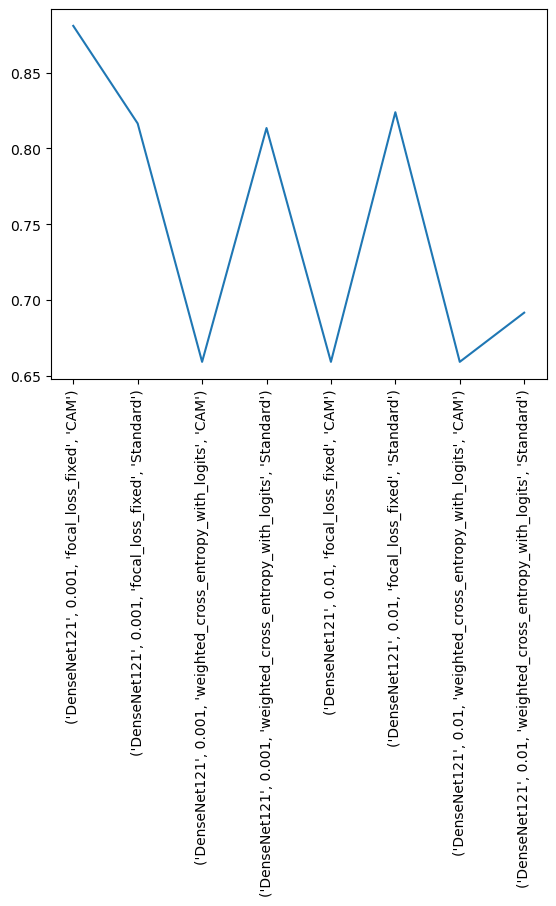

In [9]:
results_dense = json.load(open('../cell_division/results_prev/DenseNet121.json'))

def plot_results(results):
    import matplotlib.pyplot as plt
    
    val_aucs = []
    for key, value in results.items():
        if value:
            val_aucs.append((key, max(value['val_auc'])))
        
    
    print(f'{c.OKGREEN} Best model: {c.ENDC}{max(val_aucs, key=lambda x: x[1])}')
    print(f'{c.OKGREEN} Val AUC: {c.ENDC}{max([x[1] for x in val_aucs])}')
    
    plt.plot([x[1] for x in val_aucs])
    plt.xticks(range(len(val_aucs)), [name for name in results.keys()], rotation=90)
    plt.show()
    
plot_results(results_dense)

 Best model: ("('EfficientNetV2L', 0.001, 'focal_loss_fixed', 'Standard')", 0.7134986519813538)
 Val AUC: 0.7134986519813538


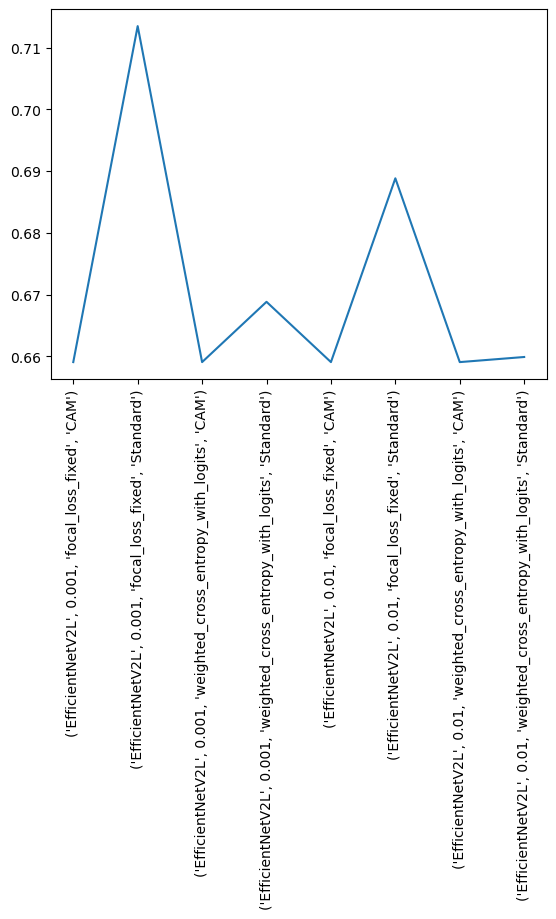

In [11]:
results_efficient_l = json.load(open('../cell_division/results_prev/EfficientNetV2L.json'))
plot_results(results_efficient_l)

 Best model: ("('EfficientNetV2M', 0.001, 'focal_loss_fixed', 'Standard')", 0.7086501121520996)
 Val AUC: 0.7086501121520996


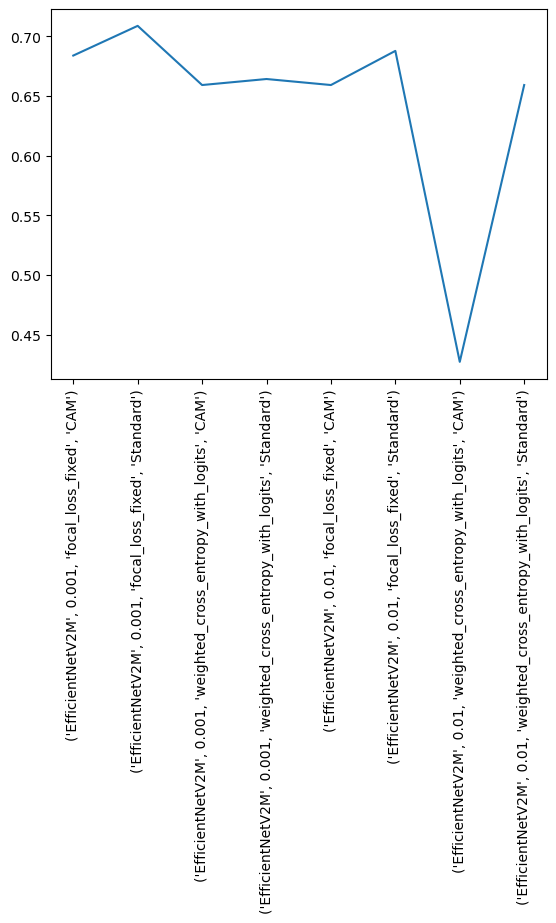

In [12]:
resulsts_efficient_m = json.load(open('../cell_division/results_prev/EfficientNetV2M.json'))
plot_results(resulsts_efficient_m)

 Best model: ("('ResNet50', 0.001, 'focal_loss_fixed', 'Standard')", 0.801781415939331)
 Val AUC: 0.801781415939331


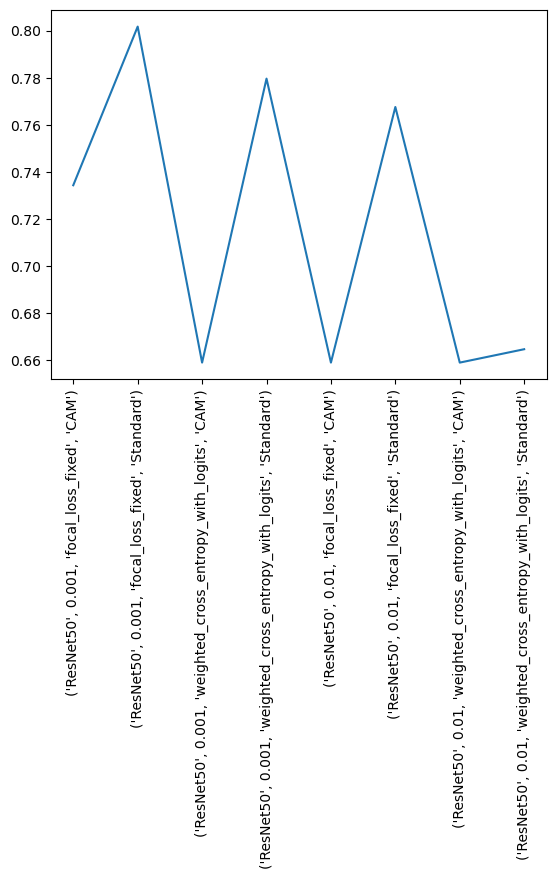

In [14]:
results_resnet = json.load(open('../cell_division/results_prev/ResNet50.json'))
plot_results(results_resnet)

 Best model: ("('VGG16', 0.01, 'focal_loss_fixed', 'CAM')", 0.8332874774932861)
 Val AUC: 0.8332874774932861


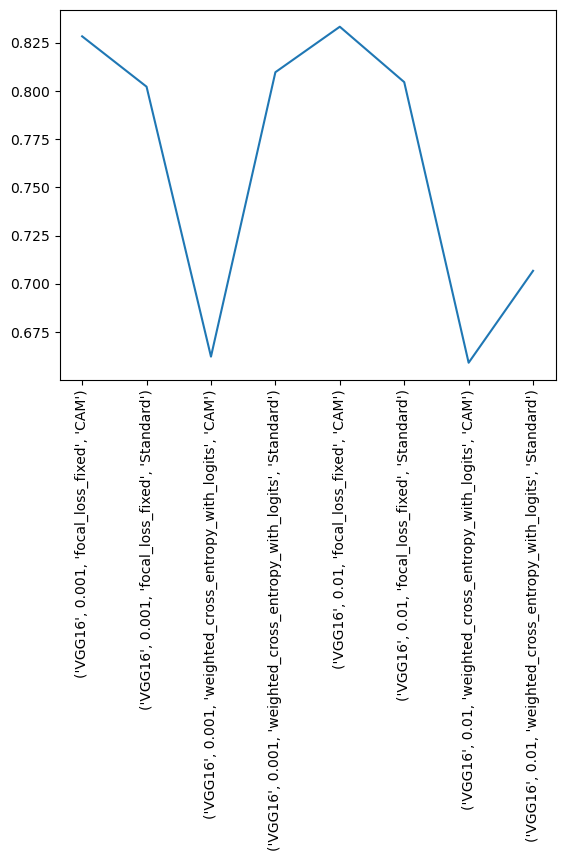

In [15]:
results_vgg = json.load(open('../cell_division/results_prev/VGG16.json'))
plot_results(results_vgg)